0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights

In [74]:
#importing all required packages

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import RobustScaler
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

In [75]:
#reading csv file for the filtered data
columns = ["SubjectID","Timestamp(microseconds)","AccelX(g)_leg","AccelY(g)_leg","AccelZ(g)_leg","GyroX(¬∞/s)_leg","GyroY(¬∞/s)_leg","GyroZ(¬∞/s)_leg","AccelX(g)_hand","AccelY(g)_hand","AccelZ(g)_hand","GyroX(¬∞/s)_hand","GyroY(¬∞/s)_hand","GyroZ(¬∞/s)_hand","AccelX(g)_chest","AccelY(g)_chest","AccelZ(g)_chest","Sample(V)","Activity_Label"]
df = pd.read_csv("PDdata_31activities.csv", header=0, names = columns, dtype={'SubjectID': str})

In [76]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V) Activity_Label  
0             -0.315862  -0.006521  Medicine Ball  
1             -0.315862  -0.006521  Medicine Ball  
2             -0.315862  -0.006521  Medicine Ball  
3             -0.340276  -0.007868  Medicine Ball  
4             -0.340276  -0.007868  Medicine Ball  
...    

In [77]:
len(df['Activity_Label'].unique())

31

In [78]:
df['Activity_Label'].unique()

array(['Medicine Ball', 'Burpees', 'step', 'scooter', 'boxing', 'cycling',
       'pushups', 'punchball', 'highraise', 'hammerthrows', 'weights',
       'throws', 'ridgeplunges', 'sidestretch', 'split', 'plank', 'dips',
       'singlelegright', 'vshiftswift', 'running', 'freestyle', 'curl',
       'armraise', 'flix', 'bosopushup', 'sideside', 'boso', 'onelegdown',
       'chair', 'squat', 'kicking'], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Activity_Label'] = LE.fit_transform(df['Activity_Label'])

In [80]:
for i, label in enumerate(LE.classes_):
    print(f"{i}: {label}")

0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights


In [81]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V)  Activity_Label  
0             -0.315862  -0.006521               1  
1             -0.315862  -0.006521               1  
2             -0.315862  -0.006521               1  
3             -0.340276  -0.007868               1  
4             -0.340276  -0.007868               1  
.

In [82]:
print(df.columns)


Index(['SubjectID', 'Timestamp(microseconds)', 'AccelX(g)_leg',
       'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg', 'GyroY(¬∞/s)_leg',
       'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand', 'AccelY(g)_hand', 'AccelZ(g)_hand',
       'GyroX(¬∞/s)_hand', 'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand',
       'AccelX(g)_chest', 'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)',
       'Activity_Label'],
      dtype='object')


In [83]:
DeleteCols = ['SubjectID','Timestamp(microseconds)']
df = df.drop(DeleteCols,axis=1)
df.head()

AccelX(g)_leg  AccelY(g)_leg  AccelZ(g)_leg  GyroX(¬∞/s)_leg  \
0      -0.621653       0.469306      -0.509712       -24.017700   
1      -0.621653       0.435859      -0.520333       -26.276036   
2      -0.622751       0.419989      -0.560128       -25.848783   
3      -0.625437       0.418280      -0.545846       -22.064546   
4      -0.621164       0.406073      -0.505074        -9.430076   

   GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  AccelX(g)_hand  AccelY(g)_hand  \
0        13.641566       -24.750134       -0.914015       -0.436103   
1        15.899901       -25.665675       -0.884230       -0.441596   
2        16.021973       -24.444953       -0.884352       -0.448432   
3        14.923323       -18.829633       -0.893629       -0.447456   
4        11.810483        -9.430076       -0.881422       -0.404730   

   AccelZ(g)_hand  GyroX(¬∞/s)_hand  GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  \
0        0.203189         -7.232776          8.575570         -4.608225   
1        0.183658         -7.598993          8.453498         -4.730297   
2        0.208316         -4.730297          9.185931         -5.401694   
3        0.200626         -3.509575          9.308003         -6.012055   
4        0.189029         -0.457771          9.674220         -6.256199   

   AccelX(g)_chest  AccelY(g)_chest  AccelZ(g)_chest  Sample(V)  \
0        -0.027771         0.902419        -0.315862  -0.006521   
1        -0.027771         0.902419        -0.315862  -0.006521   
2        -0.027771         0.902419        -0.315862  -0.006521   
3        -0.011170         0.953689        -0.340276  -0.007868   
4        -0.011170         0.953689        -0.340276  -0.007868   

   Activity_Label  
0               1  
1               1  
2               1  
3               1  
4               1

In [84]:
count = sum(df['Activity_Label'] == 1)
count

9759

In [85]:
import pickle

# Load model architecture
with open('LSTMmodel_architecture.pkl', 'rb') as f:
    model = pickle.load(f)

# Load model weights
with open('LSTMmodel_weights.pkl', 'rb') as f:
    model.set_weights(pickle.load(f))



Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-06 18:55:40         3913
variables.h5                                   2023-02-06 18:55:40      1687920
metadata.json                                  2023-02-06 18:55:40           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optim

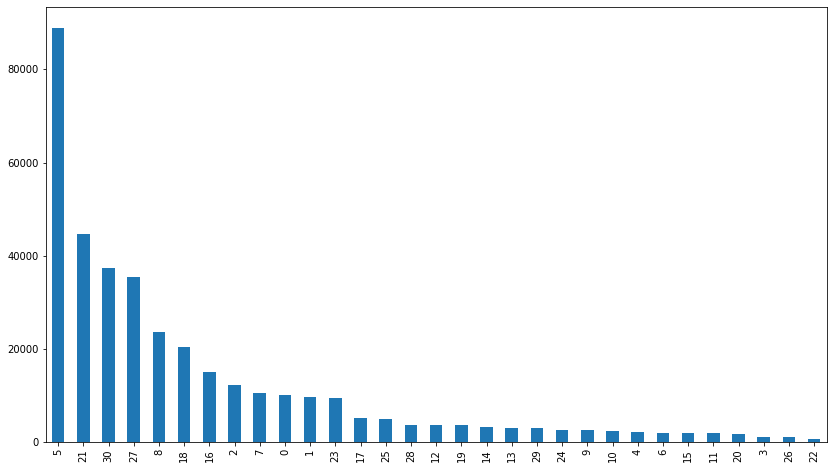

In [15]:
ax = df['Activity_Label'].value_counts().plot(kind='bar',figsize=(14,8))

In [86]:
PredictorCol=['AccelX(g)_leg', 'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg',
       'GyroY(¬∞/s)_leg', 'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand',
       'AccelY(g)_hand', 'AccelZ(g)_hand', 'GyroX(¬∞/s)_hand',
       'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand', 'AccelX(g)_chest',
       'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)']
TargetCol= 'Activity_Label'

X = df[PredictorCol].values
y = df[TargetCol].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1.0, random_state=12)

In [87]:
X = np.array(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))


In [91]:
prediction=model.predict(X)
from sklearn import metrics
#print(metrics.classification_report(y, prediction))
#print(metrics.confusion_matrix(y, prediction))

11500/11500 [==============================] - 13s 1ms/step


In [92]:
prediction = np.round(prediction)
prediction = np.argmax(prediction, axis=1)


In [93]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.03      0.46      0.05     10070
           1       0.02      0.00      0.00      9759
           2       0.06      0.01      0.01     12257
           3       0.00      0.00      0.00      1189
           4       0.00      0.00      0.00      2253
           5       0.18      0.02      0.04     88895
           6       0.00      0.01      0.01      2003
           7       0.04      0.02      0.02     10439
           8       0.01      0.00      0.00     23712
           9       0.00      0.00      0.00      2500
          10       0.00      0.00      0.00      2438
          11       0.01      0.02      0.01      1875
          12       0.01      0.05      0.01      3631
          13       0.03      0.01      0.01      3067
          14       0.00      0.03      0.01      3255
          15       0.00      0.00      0.00      1877
          16       0.05      0.05      0.05     14940
          17       0.06    

In [95]:
test_loss, test_accuracy = model.evaluate(X, y)

print("Test Accuracy:", test_accuracy)


11500/11500 [==============================] - 14s 1ms/step - loss: 8.8058 - accuracy: 0.0370
Test Accuracy: 0.036993756890296936


In [16]:
df

AccelX(g)_leg  AccelY(g)_leg  AccelZ(g)_leg  GyroX(¬∞/s)_leg  \
0           -0.621653       0.469306      -0.509712       -24.017700   
1           -0.621653       0.435859      -0.520333       -26.276036   
2           -0.622751       0.419989      -0.560128       -25.848783   
3           -0.625437       0.418280      -0.545846       -22.064546   
4           -0.621164       0.406073      -0.505074        -9.430076   
...               ...            ...            ...              ...   
367976      -1.160723      -0.046326       0.274479        33.417258   
367977      -1.077592      -0.114809       0.132265        28.168154   
367978      -1.013016      -0.075624      -0.015930        -3.082322   
367979      -0.677317       0.022278      -0.229068       -41.412985   
367980      -0.248234       0.029603      -0.372259       -85.786221   

        GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  AccelX(g)_hand  AccelY(g)_hand  \
0             13.641566       -24.750134       -0.914015       -0.436103   
1             15.899901       -25.665675       -0.884230       -0.441596   
2             16.021973       -24.444953       -0.884352       -0.448432   
3             14.923323       -18.829633       -0.893629       -0.447456   
4             11.810483        -9.430076       -0.881422       -0.404730   
...                 ...              ...             ...             ...   
367976       -35.919738       -34.149691        0.470649        0.293400   
367977       -10.772869       -33.173114        0.466133        0.296574   
367978         4.425116       -37.506676        0.465278        0.314397   
367979        25.909819       -35.553521        0.456123        0.335149   
367980        83.527886       -37.567712        0.458076        0.318181   

        AccelZ(g)_hand  GyroX(¬∞/s)_hand  GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  \
0             0.203189         -7.232776          8.575570         -4.608225   
1             0.183658         -7.598993          8.453498         -4.730297   
2             0.208316         -4.730297          9.185931         -5.401694   
3             0.200626         -3.509575          9.308003         -6.012055   
4             0.189029         -0.457771          9.674220         -6.256199   
...                ...               ...               ...               ...   
367976       -0.783276         53.925383          3.082322        -27.862974   
367977       -0.814771         54.047456          0.030518        -24.628061   
367978       -0.822217         53.864347         -3.326467        -19.562066   
367979       -0.818677         46.540017         -7.354849        -14.190890   
367980       -0.816114         36.224918        -12.420844         -7.965209   

        AccelX(g)_chest  AccelY(g)_chest  AccelZ(g)_chest  Sample(V)  \
0             -0.027771         0.902419        -0.315862  -0.006521   
1             -0.027771         0.902419        -0.315862  -0.006521   
2             -0.027771         0.902419        -0.315862  -0.006521   
3             -0.011170         0.953689        -0.340276  -0.007868   
4             -0.011170         0.953689        -0.340276  -0.007868   
...                 ...              ...              ...        ...   
367976        -0.303166         0.894118         0.033265  -0.010724   
367977        -0.310491         0.842359         0.020081  -0.009413   
367978        -0.310491         0.842359         0.020081  -0.009413   
367979        -0.289982         0.826734        -0.032166  -0.009739   
367980        -0.289982         0.826734        -0.032166  -0.009739   

        Activity_Label  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
367976              14  
367977              14  
367978              14  
367979              14  
367980              14  

[367981 rows x 17 columns]

In [96]:
for i in range(len(y)):
    print("Actual Label: ", y[i], " Predicted Label: ", prediction[i])

Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  32
Actual Label:  1  Predicted Label:  32

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
from collections import defaultdict
label_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  27
Actual Label:  1  Predicted Label:  32
Actual Label:  1  Predicted Label:  32

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  24
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  20
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  7
Actual Label:  5  Predicted Label:  29
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  16
Actual Label:  5  Predicted Label:  0
Act

In [98]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    total_counts[f'actual{actual_label}'] += 1

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")
    else:
        print(f"Ratio for {label} cannot be calculated because the actual label count is 0.")



Label Counts:
actual_1_predicted_0: 4424
actual_1_predicted_24: 258
actual_1_predicted_25: 130
actual_1_predicted_14: 567
actual_1_predicted_27: 629
actual_1_predicted_32: 1315
actual_1_predicted_9: 23
actual_1_predicted_7: 130
actual_1_predicted_17: 5
actual_1_predicted_12: 721
actual_1_predicted_11: 254
actual_1_predicted_16: 438
actual_1_predicted_5: 226
actual_1_predicted_20: 140
actual_1_predicted_2: 20
actual_1_predicted_6: 84
actual_1_predicted_30: 228
actual_1_predicted_4: 9
actual_1_predicted_1: 18
actual_1_predicted_13: 25
actual_1_predicted_18: 2
actual_0_predicted_14: 611
actual_0_predicted_27: 510
actual_0_predicted_0: 4613
actual_0_predicted_32: 1635
actual_0_predicted_11: 188
actual_0_predicted_12: 601
actual_0_predicted_16: 482
actual_0_predicted_4: 16
actual_0_predicted_5: 245
actual_0_predicted_7: 124
actual_0_predicted_9: 24
actual_0_predicted_20: 181
actual_0_predicted_25: 123
actual_0_predicted_30: 190
actual_0_predicted_24: 309
actual_0_predicted_10: 5
actual_0_p

In [99]:
import pandas as pd

data = {'Label': [], 'Ratio': []}
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        data['Label'].append(label)
        data['Ratio'].append(count / total_counts[f'actual{actual_label}'])
    else:
        data['Label'].append(label)
        data['Ratio'].append("N/A")
        
df2 = pd.DataFrame(data)
print(df2)

                      Label     Ratio
0      actual_1_predicted_0  0.453325
1     actual_1_predicted_24  0.026437
2     actual_1_predicted_25  0.013321
3     actual_1_predicted_14  0.058100
4     actual_1_predicted_27  0.064453
..                      ...       ...
787   actual_14_predicted_9  0.000922
788   actual_14_predicted_1  0.001536
789  actual_14_predicted_21  0.000614
790  actual_23_predicted_22  0.000107
791  actual_14_predicted_13  0.000614

[792 rows x 2 columns]


In [100]:
import pandas as pd

results = []
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        ratio = count / total_counts[f'actual{actual_label}']
        total = total_counts[f'actual{actual_label}']
    else:
        ratio = None
    results.append([label, count,  total,ratio])

df2 = pd.DataFrame(results, columns=["Label", "Count","Total", "Ratio=count/total"])
print(df2)

                      Label  Count  Total  Ratio=count/total
0      actual_1_predicted_0   4424   9759           0.453325
1     actual_1_predicted_24    258   9759           0.026437
2     actual_1_predicted_25    130   9759           0.013321
3     actual_1_predicted_14    567   9759           0.058100
4     actual_1_predicted_27    629   9759           0.064453
..                      ...    ...    ...                ...
787   actual_14_predicted_9      3   3255           0.000922
788   actual_14_predicted_1      5   3255           0.001536
789  actual_14_predicted_21      2   3255           0.000614
790  actual_23_predicted_22      1   9382           0.000107
791  actual_14_predicted_13      2   3255           0.000614

[792 rows x 4 columns]


In [101]:
pd.options.display.max_rows = None



In [102]:
df2

Label  Count  Total  Ratio=count/total
0      actual_1_predicted_0   4424   9759           0.453325
1     actual_1_predicted_24    258   9759           0.026437
2     actual_1_predicted_25    130   9759           0.013321
3     actual_1_predicted_14    567   9759           0.058100
4     actual_1_predicted_27    629   9759           0.064453
5     actual_1_predicted_32   1315   9759           0.134747
6      actual_1_predicted_9     23   9759           0.002357
7      actual_1_predicted_7    130   9759           0.013321
8     actual_1_predicted_17      5   9759           0.000512
9     actual_1_predicted_12    721   9759           0.073881
10    actual_1_predicted_11    254   9759           0.026027
11    actual_1_predicted_16    438   9759           0.044882
12     actual_1_predicted_5    226   9759           0.023158
13    actual_1_predicted_20    140   9759           0.014346
14     actual_1_predicted_2     20   9759           0.002049
15     actual_1_predicted_6     84   9759           0.008607
16    actual_1_predicted_30    228   9759           0.023363
17     actual_1_predicted_4      9   9759           0.000922
18     actual_1_predicted_1     18   9759           0.001844
19    actual_1_predicted_13     25   9759           0.002562
20    actual_1_predicted_18      2   9759           0.000205
21    actual_0_predicted_14    611  10070           0.060675
22    actual_0_predicted_27    510  10070           0.050645
23     actual_0_predicted_0   4613  10070           0.458093
24    actual_0_predicted_32   1635  10070           0.162363
25    actual_0_predicted_11    188  10070           0.018669
26    actual_0_predicted_12    601  10070           0.059682
27    actual_0_predicted_16    482  10070           0.047865
28     actual_0_predicted_4     16  10070           0.001589
29     actual_0_predicted_5    245  10070           0.024330
30     actual_0_predicted_7    124  10070           0.012314
31     actual_0_predicted_9     24  10070           0.002383
32    actual_0_predicted_20    181  10070           0.017974
33    actual_0_predicted_25    123  10070           0.012214
34    actual_0_predicted_30    190  10070           0.018868
35    actual_0_predicted_24    309  10070           0.030685
36    actual_0_predicted_10      5  10070           0.000497
37     actual_0_predicted_6     68  10070           0.006753
38    actual_0_predicted_18      3  10070           0.000298
39    actual_0_predicted_28     42  10070           0.004171
40    actual_0_predicted_13     34  10070           0.003376
41    actual_0_predicted_29     24  10070           0.002383
42     actual_0_predicted_2      9  10070           0.000894
43    actual_0_predicted_15      4  10070           0.000397
44    actual_0_predicted_21      1  10070           0.000099
45    actual_27_predicted_0  16701  35496           0.470504
46    actual_27_predicted_7    588  35496           0.016565
47   actual_27_predicted_32   4976  35496           0.140185
48   actual_27_predicted_12   1862  35496           0.052457
49   actual_27_predicted_16   1611  35496           0.045385
50    actual_27_predicted_9     79  35496           0.002226
51   actual_27_predicted_13    157  35496           0.004423
52   actual_27_predicted_27   1869  35496           0.052654
53    actual_27_predicted_6    465  35496           0.013100
54   actual_27_predicted_30    540  35496           0.015213
55   actual_27_predicted_17     16  35496           0.000451
56   actual_27_predicted_14   1996  35496           0.056232
57   actual_27_predicted_20    663  35496           0.018678
58   actual_27_predicted_24   1368  35496           0.038540
59   actual_27_predicted_11    377  35496           0.010621
60   actual_27_predicted_15     10  35496           0.000282
61    actual_27_predicted_5   1128  35496           0.031778
62   actual_27_predicted_28    106  35496           0.002986
63   actual_27_predicted_25    551  35496           0.015523
64   actual_27_predicted_29     45  35496           0.001

In [103]:
df2.sort_values(by='Ratio=count/total', ascending=False, inplace=True)


In [106]:
df2.to_csv("LSTM_results.csv")

In [105]:
df2

Label  Count  Total  Ratio=count/total
673   actual_22_predicted_0    453    751           0.603196
749   actual_26_predicted_0    668   1126           0.593250
711   actual_15_predicted_0    971   1877           0.517315
689    actual_3_predicted_0    607   1189           0.510513
645    actual_4_predicted_0   1140   2253           0.505992
616   actual_10_predicted_0   1196   2438           0.490566
176   actual_18_predicted_0   9964  20465           0.486880
446    actual_9_predicted_0   1196   2500           0.478400
75    actual_21_predicted_0  21314  44608           0.477807
204   actual_17_predicted_0   2452   5190           0.472447
592    actual_2_predicted_0   5779  12257           0.471486
45    actual_27_predicted_0  16701  35496           0.470504
229   actual_13_predicted_0   1437   3067           0.468536
566    actual_7_predicted_0   4881  10439           0.467574
312   actual_28_predicted_0   1724   3756           0.458999
23     actual_0_predicted_0   4613  10070           0.458093
104    actual_5_predicted_0  40699  88895           0.457832
731    actual_6_predicted_0    915   2003           0.456815
0      actual_1_predicted_0   4424   9759           0.453325
492   actual_29_predicted_0   1322   2938           0.449966
369   actual_23_predicted_0   4190   9382           0.446600
287   actual_30_predicted_0  16654  37291           0.446596
392   actual_25_predicted_0   2176   4876           0.446267
265   actual_12_predicted_0   1611   3631           0.443679
543   actual_11_predicted_0    828   1875           0.441600
418   actual_16_predicted_0   6461  14940           0.432463
522  actual_20_predicted_32    747   1750           0.426857
473   actual_24_predicted_0   1057   2562           0.412568
148    actual_8_predicted_0   9258  23712           0.390435
770   actual_14_predicted_0   1264   3255           0.388326
344  actual_19_predicted_32   1356   3630           0.373554
343   actual_19_predicted_0   1147   3630           0.315978
525   actual_20_predicted_0    542   1750           0.309714
772  actual_14_predicted_32    983   3255           0.301997
154   actual_8_predicted_32   7087  23712           0.298878
393  actual_25_predicted_32   1171   4876           0.240156
421  actual_16_predicted_32   3289  14940           0.220147
738   actual_6_predicted_32    432   2003           0.215676
477  actual_24_predicted_32    512   2562           0.199844
545  actual_11_predicted_32    368   1875           0.196267
496  actual_29_predicted_32    528   2938           0.179714
475   actual_24_predicted_5    439   2562           0.171351
24    actual_0_predicted_32   1635  10070           0.162363
615   actual_10_predicted_5    375   2438           0.153815
112   actual_5_predicted_32  13246  88895           0.149007
570   actual_7_predicted_32   1553  10439           0.148769
713  actual_15_predicted_32    278   1877           0.148109
368  actual_23_predicted_32   1361   9382           0.145065
47   actual_27_predicted_32   4976  35496           0.140185
267  actual_12_predicted_32    495   3631           0.136326
5     actual_1_predicted_32   1315   9759           0.134747
79   actual_21_predicted_32   5953  44608           0.133451
175  actual_18_predicted_32   2478  20465           0.121085
751  actual_26_predicted_20    136   1126           0.120782
209  actual_17_predicted_32    622   5190           0.119846
647   actual_4_predicted_24    265   2253           0.117621
313  actual_28_predicted_32    426   3756           0.113419
688   actual_3_predicted_32    126   1189           0.105971
300  actual_30_predicted_32   3928  37291           0.105334
448   actual_9_predicted_32    263   2500           0.105200
268  actual_12_predicted_14    360   3631           0.099146
620  actual_10_predicted_16    241   2438           0.098852
240  actual_13_predicted_32    302   3067           0.098468
523  actual_20_predicted_12    152   1750           0.086857
651   actual_4_predicted_20    185   2253           0.082